In [61]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [62]:
data = pd.read_csv('../data/train_qso_wo_image.csv')

In [63]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']])
data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']] = s.transform(data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']])

## Train Test Split

In [64]:
X = data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2']]

y = data['class_bin']

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

## Model(basic)

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.803921568627451
F1: 0.8000000000000002
recall: 0.8


In [67]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
#generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
#prodict probability
clf_prob = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only/
clf_prob = clf_prob[:, 1]

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, ns_prob)
lr_auc = roc_auc_score(y_test, clf_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.915


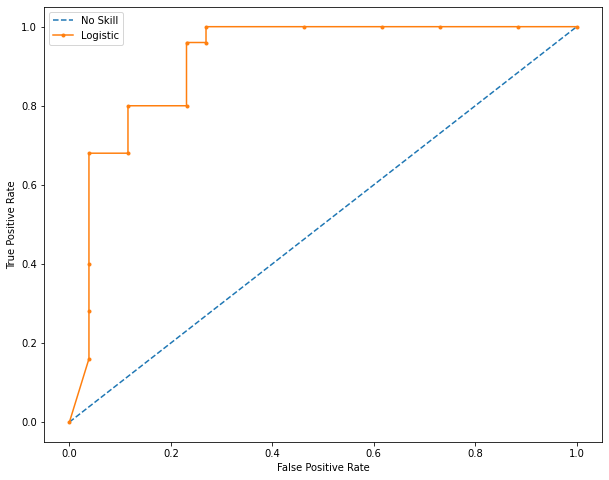

In [70]:
import matplotlib.pyplot as plt
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_prob)


plt.figure(figsize=(10, 8))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.savefig('../figures/rfc_v1_rocauc.png')
# show the plot
plt.show()



In [71]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

jw2     0.096899
jw1     0.092621
w1w2    0.089167
gk      0.061749
ij      0.059421
kw2     0.051926
iw2     0.042981
kw1     0.037913
gw1     0.036683
rw1     0.030938
uw2     0.030827
ik      0.030282
zj      0.029722
zk      0.028733
iw1     0.027804
uj      0.022891
rz      0.020560
uk      0.020210
gz      0.019823
zw1     0.017720
gw2     0.017417
uw1     0.016972
gi      0.016399
zw2     0.015454
iz      0.015162
gr      0.013445
ur      0.011981
ri      0.011424
ug      0.009716
rw2     0.009572
uz      0.007462
ui      0.006127
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


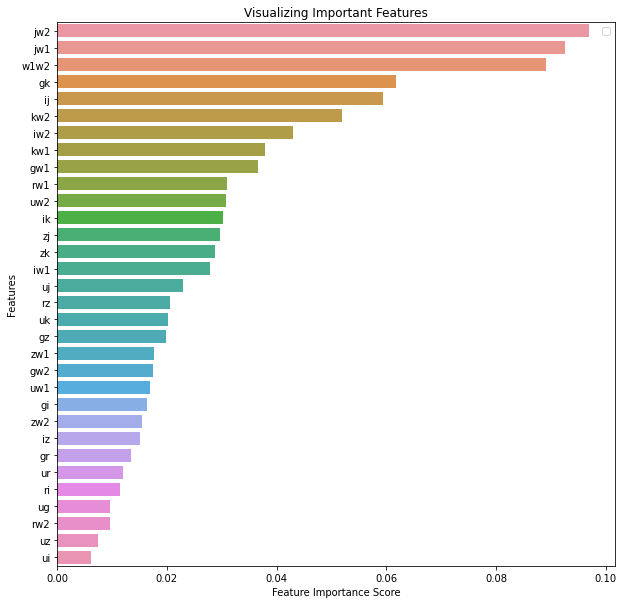

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('../figures/rfc_v1_features.png')
plt.show()



>1, train: 1.000, test: 0.765
>11, train: 1.000, test: 0.804
>21, train: 1.000, test: 0.804
>31, train: 1.000, test: 0.804
>41, train: 1.000, test: 0.784
>51, train: 1.000, test: 0.824
>61, train: 1.000, test: 0.824
>71, train: 1.000, test: 0.843
>81, train: 1.000, test: 0.804
>91, train: 1.000, test: 0.824
>101, train: 1.000, test: 0.804
>111, train: 1.000, test: 0.824
>121, train: 1.000, test: 0.804
>131, train: 1.000, test: 0.843
>141, train: 1.000, test: 0.824
>151, train: 1.000, test: 0.804
>161, train: 1.000, test: 0.824
>171, train: 1.000, test: 0.804
>181, train: 1.000, test: 0.824
>191, train: 1.000, test: 0.804
>201, train: 1.000, test: 0.843
>211, train: 1.000, test: 0.804
>221, train: 1.000, test: 0.784
>231, train: 1.000, test: 0.824
>241, train: 1.000, test: 0.804
>251, train: 1.000, test: 0.824
>261, train: 1.000, test: 0.804
>271, train: 1.000, test: 0.804
>281, train: 1.000, test: 0.784
>291, train: 1.000, test: 0.804
>301, train: 1.000, test: 0.804
>311, train: 1.000,

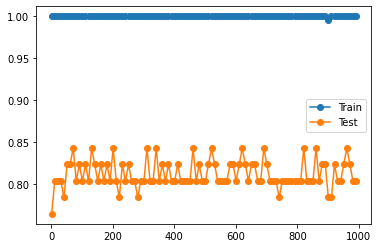

In [73]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 1000,10)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier()
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()